In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
# Read the excel file into a pandas DataFrame

alldata = pd.read_excel('combined_data.xls')
alldata.head()

,Current residence in,Population 1 year and over,Same house 1 year ago,Same state of residence 1 year ago,Total_Incoming,Total_Outgoing,Net Migration,Avg. Home Price,Percent of Job Growth,Alabama,...,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Total,Puerto Rico,U.S. Island Area,Foreign Country4,Foreign Country
0,Alabama,4819343,4158224,535649,111803,101466,10337,129174.0000,1.09,0,...,4277,1289,1070,1121,104,13667,476,0,13191,0
1,Alaska,730874,595804,98168,30199,42972,-12773,291458.9167,-1.30,942,...,360,3653,0,2500,6,6703,0,965,5738,0
2,Arizona,6935358,5717189,911120,261727,163214,98513,228362.7500,2.52,1337,...,3593,14392,318,3897,997,45322,438,91,44793,0
3,Arkansas,2968395,2509717,370309,79411,69850,9561,120987.0833,1.27,574,...,1087,1539,0,958,12,8958,573,0,8385,0
4,California,39085984,34009331,4234770,523131,661026,-137895,508307.1667,2.10,3715,...,21162,33143,789,9348,1395,318752,1864,842,316046,0


In [39]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = alldata["Percent of Job Growth"].values.reshape(-1, 1)
y = alldata["Avg. Home Price"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (159, 1) (159, 1)


Text(0, 0.5, 'Avg Home Price')

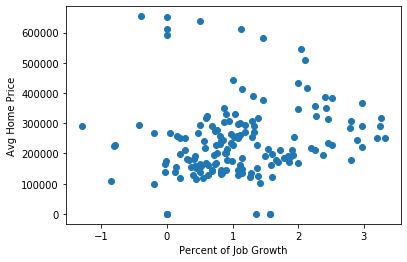

In [40]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("Percent of Job Growth")
plt.ylabel("Avg. Home Price")

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)

In [42]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [43]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[15965.76479907]]
y-axis intercept:  [227690.95165144]


In [45]:
# Note: we have to transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[-1.3]]
Max X Value: [[3.32]]


In [46]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0, 0.5, 'Avg Home Price')

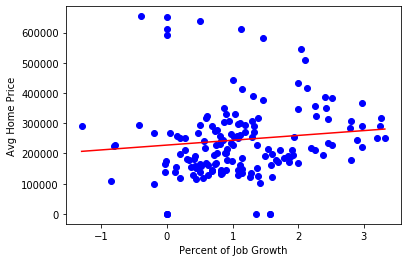

In [47]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel("Percent of Job Growth")
plt.ylabel("Avg Home Price")

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 13588520224.382349
R-squared (R2 ): -0.006787041454038967


In [49]:
model.score(X_test, y_test)

-0.006787041454038967

In [50]:
## Is there a correlation with the Migration
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = alldata["Net Migration"].values.reshape(-1, 1)
y = alldata["Avg. Home Price"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (159, 1) (159, 1)


Text(0, 0.5, 'Avg Home Price')

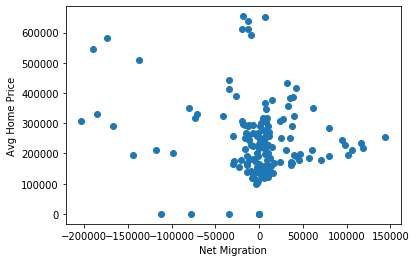

In [51]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("Net Migration")
plt.ylabel("Avg Home Price")

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)

In [53]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [54]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.58434758]]
y-axis intercept:  [243788.2488838]


In [56]:
# Note: we have to transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

In [57]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0, 0.5, 'Avg Home Price')

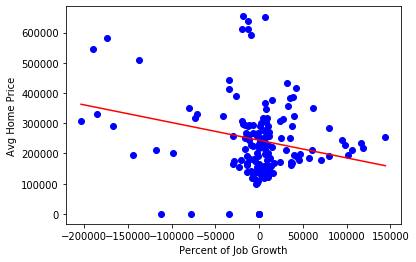

In [58]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel("Percent of Job Growth")
plt.ylabel("Avg Home Price")

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 14976852282.988104
R-squared (R2 ): -0.10964995093637131


In [60]:
model.score(X_test, y_test)

-0.10964995093637131

In [64]:
#Do two variables make a difference

# Assign the data to X and y

X = alldata[["Avg. Home Price", "Percent of Job Growth"]]
y = alldata["Net Migration"].values.reshape(-1, 1)
print(X.shape, y.shape)

(159, 2) (159, 1)


In [70]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)

In [71]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [72]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [73]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

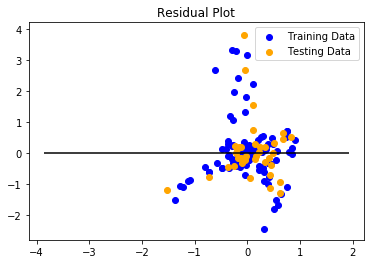

In [74]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [75]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8495610323557592, R2: 0.1134006648330187


In [76]:
## Correlation of Net Migration and Job Growth
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = alldata["Net Migration"].values.reshape(-1, 1)
y = alldata["Percent of Job Growth"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (159, 1) (159, 1)


Text(0, 0.5, 'Percent of Job Growth')

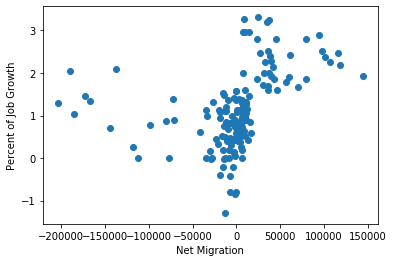

In [78]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("Net Migration")
plt.ylabel("Percent of Job Growth")

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)

In [80]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [81]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[5.54926647e-06]]
y-axis intercept:  [1.0917514]


In [83]:
# Note: we have to transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[-203567]]
Max X Value: [[144310]]


In [84]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0, 0.5, 'Percent of Job Growth')

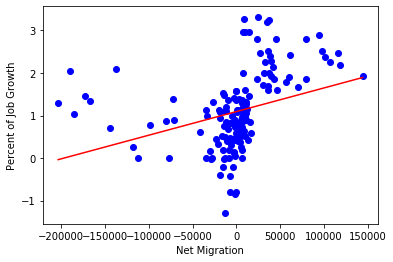

In [85]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel("Net Migration")
plt.ylabel("Percent of Job Growth")

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.7487402345406012
R-squared (R2 ): 0.14318546395541498


In [87]:
model.score(X_test, y_test)

0.14318546395541498